In [54]:
import pandas as pd
import numpy as np

rawdata = pd.read_csv('Telco_Customer_Churn.csv')
rawdata.head()
abc =rawdata.TotalCharges.str.strip()

totalchargesnewdata =  abc.apply(pd.to_numeric)
print(totalchargesnewdata)
rawdata.isnull().sum()
#newdata =  data.apply(pd.to_numeric)


genderdummies =pd.get_dummies(rawdata.gender, drop_first=True)
genderdummies
#@SeniorCitizendummiy =pd.get_dummies(rawdata.SeniorCitizen, drop_first=True)
#SeniorCitizendummiy
#genderdummies
#rawdata.head
Dependentsdummi =pd.get_dummies(rawdata.Dependents, drop_first=True)
Dependentsdummi
rawdata.head

#tenuredumi = pd.get_dummies(rawdata.tenure, drop_first=True)
#tenuredumi
PhoneServicedmi =pd.get_dummies(rawdata.PhoneService, drop_first=True)
PhoneServicedmi
InternetServicedumi = pd.get_dummies(rawdata.InternetService, drop_first=True)
InternetServicedumi

DeviceProtectiondumi = pd.get_dummies(rawdata.DeviceProtection, drop_first=True)
DeviceProtectiondumi
TechSupportdummi =pd.get_dummies(rawdata.TechSupport, drop_first=True)
TechSupportdummi
CableServicedummi = pd.get_dummies(rawdata.CableService, drop_first=True)
CableServicedummi
Contractdumi =pd.get_dummies(rawdata.Contract, drop_first=True)
print(Contractdumi)
PaperlessBillingdumi =pd.get_dummies(rawdata.PaperlessBilling, drop_first=True)
PaperlessBillingdumi
PaymentMethoddumi =pd.get_dummies(rawdata.PaymentMethod, drop_first=True)
PaymentMethoddumi
Churndumi =pd.get_dummies(rawdata.Churn, drop_first=True)
dropcolumn =['customerID','gender','Dependents','PhoneService','InternetService','DeviceProtection','TechSupport',
                     'CableService','Contract','PaperlessBilling','PaymentMethod','Churn']
rawdata =rawdata.drop(dropcolumn,axis=1)
rawdata
#Churndumi
rawdata['genderdummies']=pd.DataFrame(genderdummies)
#rawdata['genderdummies']=pd.DataFrame(genderdummies)
rawdata['Dependentsdummi']=pd.DataFrame(Dependentsdummi)
rawdata['PhoneServicedmi']=pd.DataFrame(PhoneServicedmi)
rawdata['internetservice']=pd.DataFrame(InternetServicedumi)
rawdata['DeviceProtection']=pd.DataFrame(DeviceProtectiondumi)
rawdata['TechSupport']=pd.DataFrame(TechSupportdummi)
rawdata['CableService']=pd.DataFrame(CableServicedummi)
rawdata
Contractdumi
contract=['oneyear','twoyear']
rawdata[contract]=pd.DataFrame(Contractdumi)
rawdata['PaperlessBilling']=pd.DataFrame(PaperlessBillingdumi)
rawdata
PaymentMethoddumi
payment=['Credit card (automatic)','Electronic check','Mailed check']
rawdata[payment]=pd.DataFrame(PaymentMethoddumi)
rawdata['Churn']=pd.DataFrame(Churndumi)
print(rawdata.isnull().sum())
rawdata =rawdata.drop('TotalCharges',axis =1)
rawdata['TotalCharges']=pd.DataFrame(totalchargesnewdata)
rawdata.shape

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64
      One year  Two year
0            0         0
1            1         0
2            0         0
3            1         0
4            0         0
...        ...       ...
7038         1         0
7039         1         0
7040         0         0
7041         0         0
7042         0         1

[7043 rows x 2 columns]
SeniorCitizen              0
tenure                     0
MonthlyCharges             0
TotalCharges               0
genderdummies              0
Dependentsdummi            0
PhoneServicedmi            0
internetservice            0
DeviceProtection           0
TechSupport                0
CableService               0
oneyear                    0
twoyear                    0
PaperlessBilling           0
Credit card (automatic)    0
Electronic chec

(7043, 18)

In [53]:
newdata =  rawdata.apply(pd.to_numeric)
print(newdata.isnull().sum())
newdata =newdata.dropna()
newdata.to_csv('finaldata.csv')

SeniorCitizen               0
tenure                      0
MonthlyCharges              0
genderdummies               0
Dependentsdummi             0
PhoneServicedmi             0
internetservice             0
DeviceProtection            0
TechSupport                 0
CableService                0
oneyear                     0
twoyear                     0
PaperlessBilling            0
Credit card (automatic)     0
Electronic check            0
Mailed check                0
Churn                       0
TotalCharges               11
dtype: int64


In [27]:
Y = newdata['Churn']
X = newdata.drop('Churn',axis=1)
X.shape

(7032, 17)

In [28]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

logisticmodel = SelectFromModel(estimator=LogisticRegression(max_iter=5000)).fit(X, Y)
logisticmodel.estimator_.coef_

array([[ 2.54811598e-01, -6.07902831e-02,  2.78999369e-02,
        -4.49301910e-02, -1.67415121e-01, -1.04565800e+00,
         1.51601942e-01, -1.87850912e-01, -6.92726760e-01,
        -9.85060004e-02, -6.27094932e-01, -1.02053985e+00,
         3.77234696e-01, -2.44887942e-01,  1.77555906e-01,
        -2.02781912e-01,  2.63546831e-04]])

In [30]:
logisticmodel.threshold_

0.31662056059698007

In [31]:
logisticmodel.get_support()

array([False, False, False, False, False,  True, False, False,  True,
       False,  True,  True,  True, False, False, False, False])

In [32]:
transformofX = logisticmodel.transform(X)
transformofX.shape
transformofX

array([[0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 0., 1., 1.]])

In [33]:
import statsmodels.api as sm
logit_model = sm.GLM(Y, X, family=sm.families.Binomial())
result=logit_model.fit(fit_intercept=True)
print(result.summary2())

                   Results: Generalized linear model
Model:                  GLM                AIC:              5938.5096  
Link Function:          logit              BIC:              -56235.9489
Dependent Variable:     Churn              Log-Likelihood:   -2952.3    
Date:                   2020-07-12 21:02   LL-Null:          -4071.7    
No. Observations:       7032               Deviance:         5904.5     
Df Model:               16                 Pearson chi2:     8.47e+03   
Df Residuals:           7015               Scale:            1.0000     
Method:                 IRLS                                            
------------------------------------------------------------------------
                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
SeniorCitizen            0.2377   0.0832   2.8574 0.0043  0.0747  0.4008
tenure                  -0.0687   0.0057 -12.0011 0.0000 -0.0799 -0.057

In [57]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

                             2.5%     97.5%        OR
SeniorCitizen            1.077516  1.492952  1.268337
tenure                   0.923229  0.944169  0.933640
MonthlyCharges           1.022374  1.036527  1.029426
genderdummies            0.846152  1.085106  0.958209
Dependentsdummi          0.700666  0.960340  0.820291
PhoneServicedmi          0.191202  0.321675  0.248002
internetservice          0.509694  0.954080  0.697344
DeviceProtection         0.700565  0.960425  0.820269
TechSupport              0.472107  0.657853  0.557294
CableService             0.694455  1.000196  0.833421
oneyear                  0.379080  0.573858  0.466410
twoyear                  0.154544  0.307138  0.217868
PaperlessBilling         1.230591  1.638319  1.419894
Credit card (automatic)  0.665594  1.017118  0.822793
Electronic check         1.068475  1.505443  1.268278
Mailed check             0.632746  0.936512  0.769789
TotalCharges             1.000247  1.000504  1.000376


In [34]:
from sklearn.model_selection import train_test_split
Xtraindata, Xtestdata, Ytraindata, Ytestdata = train_test_split(X, Y, test_size=0.25, random_state=42)
print(Xtraindata.shape)
print(Xtestdata.shape)
print(Ytraindata.shape)
print(Ytestdata.shape)

(5274, 17)
(1758, 17)
(5274,)
(1758,)


In [35]:
import pandas as pd
print("yesd")
import sys, setuptools, tokenize
#import ez_setup
import xgboost
#!pip3 install Xgboost
import xgboost
print("you are here")
#!pip #install xgboost
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
print("done")
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, log_loss

yesd
you are here
done


In [36]:
import sklearn
names  = ["Logististic Regression", "Nearest Neighbors", "Linear SVM", "RBF SVM", 
                 "Neural Net", "Naive Bayes", "Decision Tree", "Majority Vote", "Random Forest", "Bagging",  
                 "AdaBoost", "XGBoost"]



lr =LogisticRegression(max_iter=10000)
knn = KNeighborsClassifier(3)
linear_svc = SVC(kernel="linear", C=0.025)
gamma_svc = SVC(gamma=2, C=1)
mlp = MLPClassifier(alpha=0.001, solver='lbfgs', learning_rate='adaptive', max_iter=100000)
dtc = DecisionTreeClassifier(max_depth=5)
gnbs = GaussianNB()

mv_clf = sklearn.ensemble.VotingClassifier(estimators=[('lr', lr), ('knn', knn), ('linear_svc', linear_svc), 
                                                       ('gamma_svc', gamma_svc),('mlp', mlp), ('dtc', dtc),
                                                       ('gnbs', gnbs)], voting='hard')


classifiers = [
               LogisticRegression(),
               KNeighborsClassifier(3),
               SVC(kernel="linear", C=0.025),
               SVC(gamma=2, C=1),
               MLPClassifier(alpha=0.001, solver='lbfgs', learning_rate='adaptive', max_iter=100000),
               GaussianNB(),
               DecisionTreeClassifier(max_depth=5),
               mv_clf,
               RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
               sklearn.ensemble.BaggingClassifier(),
               AdaBoostClassifier(),
               XGBClassifier()]

Scoreofclassifier =[]

for classifier in classifiers:
    pipeline = Pipeline(steps=[
                      ('classifier', classifier)])
    pipeline.fit(Xtraindata, Ytraindata)   
    print(classifier)
    Scoreofclassifier.append(pipeline.score(Xtestdata, Ytestdata))
    print("model score: %.3f" % pipeline.score(Xtestdata, Ytestdata))
    print("\n -----------------------------------------------------------------------------------")
    
#end of pipeline

#Create a dataframe for prediction scores
scores_df = pd.DataFrame(zip(names,Scoreofclassifier), columns=['Classifier', 'Accuracy Score'])

scores_df

C:\Users\Aki\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model score: 0.790

 -----------------------------------------------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
model score: 0.753

 -----------------------------------------------------------------------------------
SVC(C=0.025, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
model score: 0.792

 -

,Classifier,Accuracy Score
0,Logististic Regression,0.790102
1,Nearest Neighbors,0.753129
2,Linear SVM,0.792378
3,RBF SVM,0.748009
4,Neural Net,0.755973
5,Naive Bayes,0.732651
6,Decision Tree,0.781570
7,Majority Vote,0.794653
8,Random Forest,0.788965
9,Bagging,0.781001


C:\Users\Aki\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


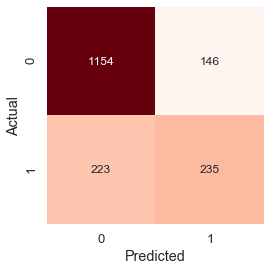

In [50]:
#LinearSVC
from sklearn import metrics
from sklearn import calibration
#from sklearn.calibration import CalibratedClassifiertCV
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


xgb =LogisticRegression()

xgb.fit(Xtraindata, Ytraindata)

###pridiction manually
y_pred_man = xgb.predict(Xtestdata)


matrixdatadata = confusion_matrix(Ytestdata, y_pred_man)

df_cm = pd.DataFrame(matrixdatadata, columns=np.unique(Ytestdata), index = np.unique(Ytestdata))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=500, square=True, fmt="d", cmap="Reds")

In [51]:
from sklearn.metrics import classification_report
print(classification_report(Ytestdata, y_pred_man))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1300
           1       0.62      0.51      0.56       458

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.78      0.79      0.78      1758



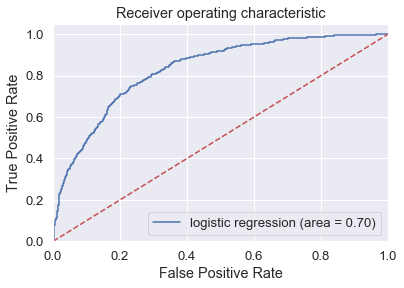

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

logit_roc_auc = roc_auc_score(Ytestdata, xgb.predict(Xtestdata))
fpr, tpr, thresholds = roc_curve(Ytestdata, xgb.predict_proba(Xtestdata)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='logistic regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [55]:
x_input= [[0,32,64,1,0,1,1,0,0,0,0,0,1,1,0,0,2283.30]]
x_ar = np.array(x_input)
y_output = xgb.predict(x_ar)
print(y_output)

[0]


In [56]:
prob = xgb.predict_proba(x_input)
print(prob)

[[0.75617974 0.24382026]]
